# Example of the module `event_displayer`

We have 3 main functions:

#  **`search()`**   
Allow us to filter events from a certain run with different parameters.
The variables we can filter are:

* *gammaness* 
* *intensity*
* *reco_energy* (reconstructed energy)
* *length*
* *width*
* *proportion*
* *time_gradient*
* *index* (filters the event ID's)

The variables we can intoduce into the function are,

* **`config`** <span style="color:red">(Requiered)</span> Configuration directions for the directorys with the information (the standard structure is defined before) 


The syntaxis used to filter is based on the inferior and superior limits for each variable.

* **`inflim_variable=...`** (for the inferior limit)
* **`suplim_variable=...`** (for the superior limit)

Also we have predefined modes to search:

* **`gamma_like`** *(True/False)* To search gamma rays
* **`muon_like`** *(True/False)* To search muons



# **`plot()`** 
A function to plot images of a list of given events ID's. We have different options:

* **`array_ids`** <span style="color:red">(Requiered)</span> Array with the event ID's to plot


* **`config`** <span style="color:red">(Requiered)</span> Configuration directions for the directorys with the information (the standard structure is defined before) 


* **`representation`** *('charge'/'time'/'both')* If we want to show the information of the charges, the peak times or both of them one nex to the other.


* **`plot_direction`** *(True/False)* If we want to plot the reconstructed direction, ellipse, and source.


* **`gamma_lim`**  From $0$ to $1$, the value of gammaness from wich we plot the direction and ellipse. Because it doesn't make sense at all to plot it if the event is not gammalike.


* **`colormap_scale`** From $0$ to $1$, the proportion of photoelectrons that we show to to print the colormap. Allow us to observe better events with high peaks of intensity.


* **`save`** *(True/False)* For save or not the events into a folder. If we want only to show them at console.


* **`plot_image`** *(True/False)* For plot or not the events in console. If we want only to save them.


* **`file_type`** *('.pdf'/'.png')* The type of file for savin the images. Default is in pdf.


* **`folder_name`** *('name')* The name of the folder in what we save the images.


# **`animate()`** 

A function to save video of a list of given events ID's. We have different options:


* **`array_ids`** <span style="color:red">(Requiered)</span> Array with the event ID's to plot 


* **`config`** <span style="color:red">(Requiered)</span> Configuration directions for the directorys with the information (the standard structure is defined before) 


* **`plot_direction`** *(True/False)* If we want to plot the reconstructed direction, ellipse, and source.


* **`gamma_lim`**  From $0$ to $1$, the value of gammaness from wich we plot the direction and ellipse. Because it doesn't make sense at all to plot it if the event is not gammalike.


* **`colormap_scale`** From $0$ to $1$, the proportion of photoelectrons that we show to to print the colormap. Allow us to observe better events with high peaks of intensity.


* **`file_type`** *('.gif/'.mp4')* The type of file for savin the images. Default is in gif. For using mp4 we need to have installed ffmpeg.


* **`fps`** The number of frames per second for the file. Defoult is set to $20$.


* **`folder_name`** *('name')* The name of the folder in what we save the images.



## Definition of `config` variable

In [1]:
# some data for the respective subrun
#number of subruns we have
number_subruns=122
#number assigned to the concrete run (only for the name of the files saved)
run_number=2969
#number of events in each subrun, normally they are saved in groups of 53000 events
subrun_events=53000


#directories

#direction of the dl2 data file (if we want to implement the direction and source)
dl2_directory="/data/cta/users-ifae/moralejo/CTA/LST/RealData/DL2/lstchain_v0.7/20201120/dl2_LST-1.Run02969.h5"

#parameters to read dl1 and dl2
dl2_parameters="dl2/event/telescope/parameters/LST_LSTCam"
dl1_parameters="/dl1/event/telescope/parameters/LST_LSTCam"

#direction of the dl1 data files for each subrun, the format we use is "directory.****.fits.fz" or "h5"
#where **** is the subrun index
dl1_directory="/data/cta/users-ifae/moralejo/CTA/LST/RealData/DL1/lstchain_V0.7/20201120/dl1_LST-1.Run02969."
#R0 directory
R0_directory="/data/cta/users-ifae/moralejo/CTA/LST/RealData/R0/20201120/LST-1.1.Run02969."



#R1 calibration
calibration_directory = "/data/cta/users-ifae/moralejo/CTA/LST/RealData/R0/20201120/calib_files/"

drs4_pedestal_path = calibration_directory + "drs4_pedestal.Run02963.0000.fits"
calib_path = calibration_directory + "calibration.Run02964.0000.hdf5"
time_calib_path = calibration_directory + "time_calibration.Run02964.0000.hdf5"

#only if we wanted to have some data without having dl2
# drive_report = calibration_directory + "drive_log_20201120.txt"
# run_summary = calibration_directory + "RunSummary_20201120.ecsv"


#configuration for reading R0 and do the calibrations
from traitlets.config import Config
# Simplified version, in case we are missing the drive_report and run_summary:
configuration = Config({'LSTEventSource': {
            'default_trigger_type': 'ucts',
            'allowed_tels': [1],
            'min_flatfield_adc': 3000,
            'min_flatfield_pixel_fraction': 0.8,
            'calibrate_flatfields_and_pedestals': True,
            'LSTR0Corrections': {
                'drs4_pedestal_path': drs4_pedestal_path,
                'calibration_path': calib_path,
                'drs4_time_calibration_path': time_calib_path,},},})

# #advanced version if we want to use the drive report and run summary (if we have dl2 not needed)
# config = Config({'LSTEventSource': {
#             'default_trigger_type': 'ucts',
#             'allowed_tels': [1],
#             'min_flatfield_adc': 3000,
#             'min_flatfield_pixel_fraction': 0.8,
#             'calibrate_flatfields_and_pedestals': False,
#             'LSTR0Corrections': {
#                 'drs4_pedestal_path': drs4_pedestal_path,
#                 'calibration_path': calib_path,
#                 'drs4_time_calibration_path': time_calib_path,},
#             'PointingSource': {'drive_report_path': drive_report,},
#             'EventTimeCalculator': {'run_summary_path': run_summary,}},})


#configuration variable
config=[number_subruns, run_number, subrun_events,
        dl2_directory, dl1_parameters, dl2_parameters, dl1_directory,
        R0_directory,
        calibration_directory, drs4_pedestal_path, calib_path, time_calib_path,
        configuration]

In [3]:
import event_displayer

**Applying a filter**

In [4]:
#filtering by gammaness and intensity

A=event_displayer.search(config,inflim_gammaness=0.99,inflim_intensity=4000)
print(A)


[799398, 1476400, 3813704]


**Plotting images of the events that passed the filter**

Plotting Event ID =799398


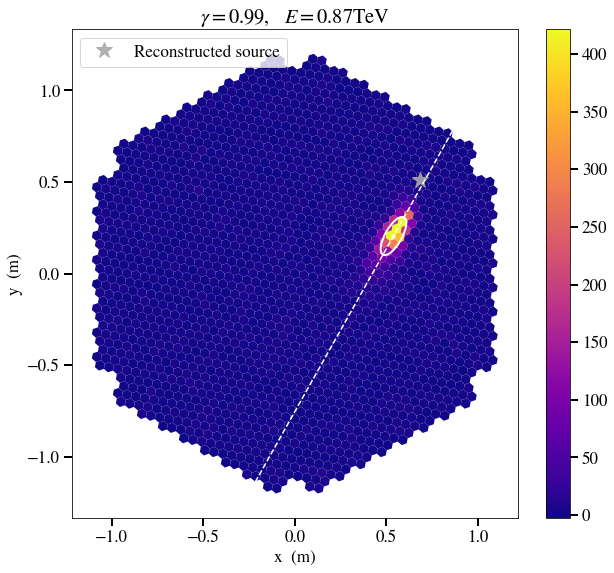

Plotting Event ID =1476400


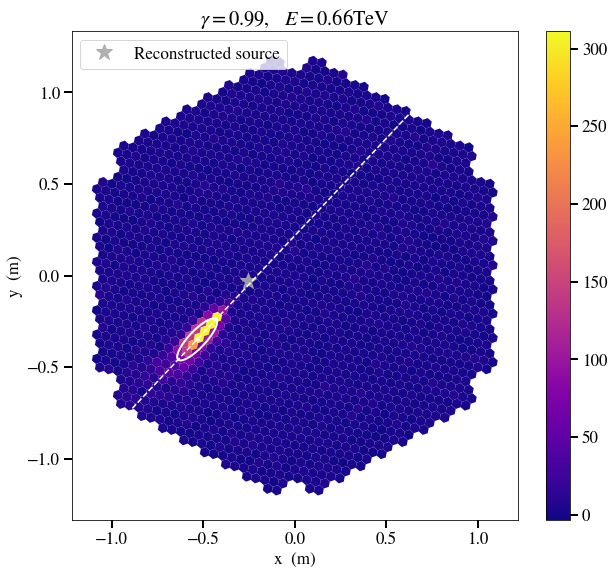

Plotting Event ID =3813704


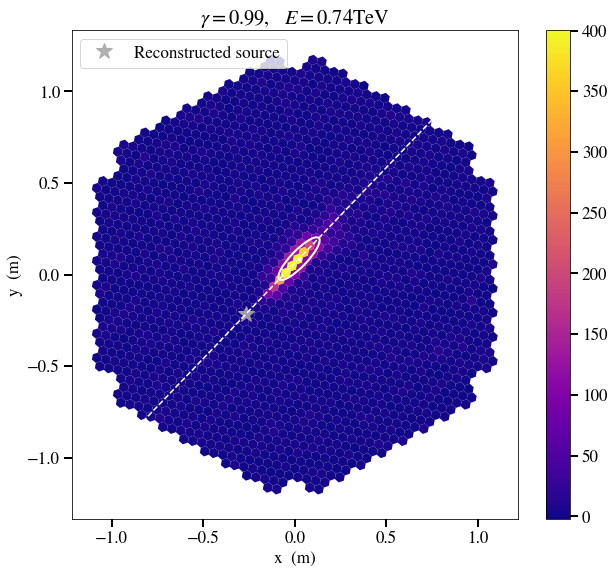

In [5]:
#saving and showing the event images in .png

event_displayer.plot(A, config, plot_direction=True, file_type='.png')


**Apllying predefined parameters for finding muons, and also filtering by event ID**

In [6]:
#filtering by index and predefined muons

B=event_displayer.search(config,muon_like=True,suplim_index=15000)
print(B)


[7090, 12860, 6827, 1067]


Plotting Event ID =1067


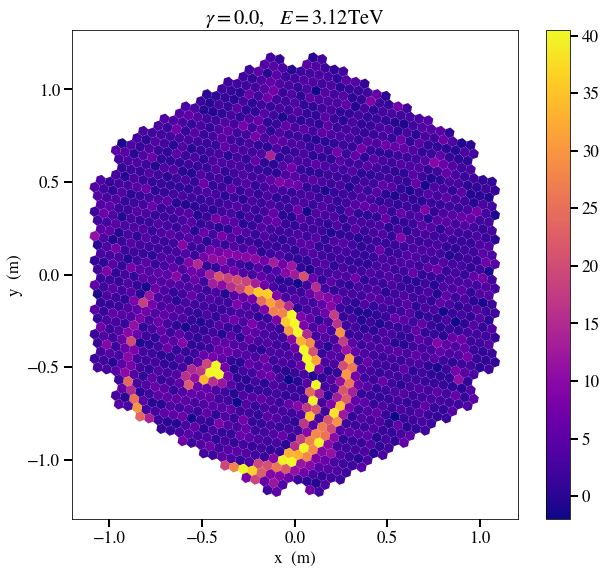

Plotting Event ID =6827


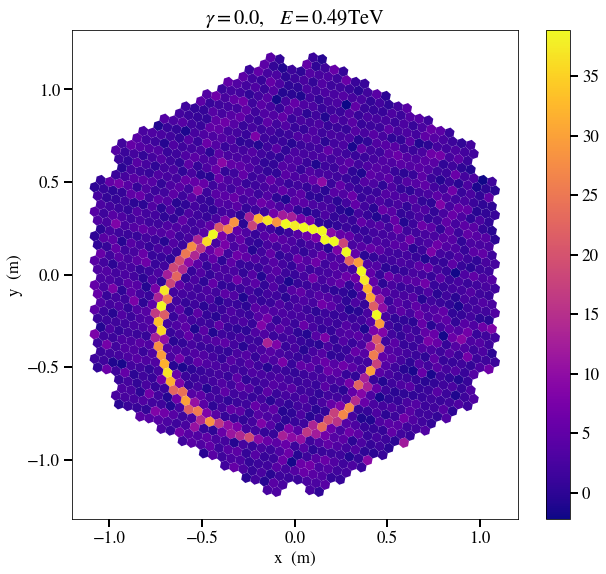

Plotting Event ID =7090


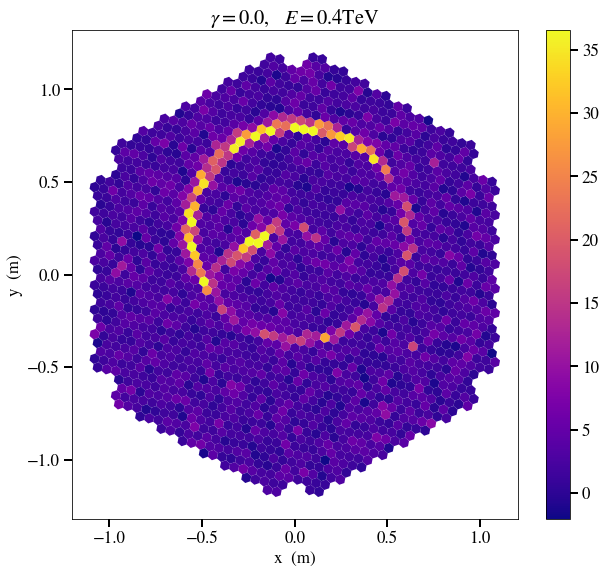

Plotting Event ID =12860


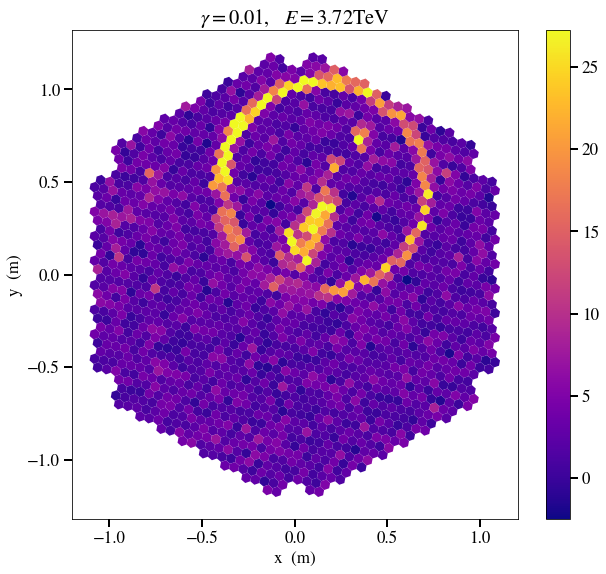

In [7]:
#showing the event images but not saving it 

event_displayer.plot(B, config, plot_direction=False, save=False)


In [8]:
#saving the event video without plotting the direction and source
#and the folder with the name 'video'

event_displayer.animate(71,config,plot_direction=False,folder_name='video')



 Estimated time = 0.24 (min) 



Using event 1 as time reference for dragon. timestamp: 1605921042034881499 from ucts counter: 6034881200
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be filled
No drive report specified, pointing info will not be fi